In [7]:
import pandas as pd
import numpy as np
import plotly.express as px

In [5]:
df_sampling = pd.read_csv('../../dataset_qc/kalib_sampling.csv')

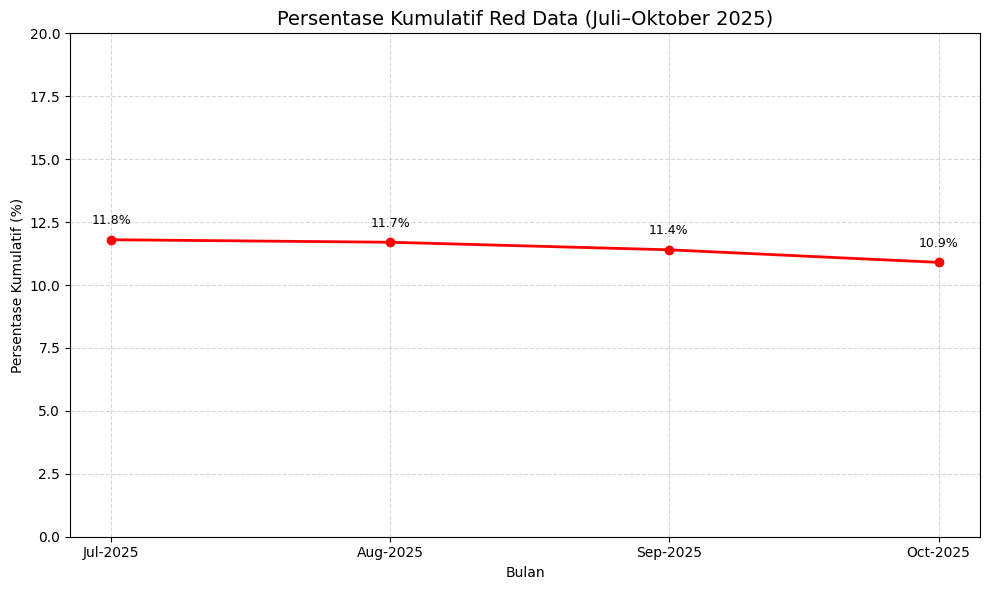

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# --- 1) Persiapan Data ---
df = df_sampling.copy()
df['Tanggal Sampling'] = pd.to_datetime(df['Tanggal Sampling'], errors='coerce')
df = df.dropna(subset=['Tanggal Sampling'])

# Normalisasi label
df['Red Label'] = df['Red Label'].astype(str).str.strip().str.upper()
df['Kategori'] = np.where(df['Red Label'].isin(['MERAH', 'TEXT', 'RED', 'RED DATA']), 'Red Data', 'Not Red')

# Ambil bulan sebagai awal bulan
df['Bulan'] = df['Tanggal Sampling'].dt.to_period('M').dt.to_timestamp()

# --- 2) Ambil hanya 3 bulan terakhir (Agustus - Oktober 2025) ---
mask = (df['Bulan'] >= '2025-07-01') & (df['Bulan'] <= '2025-10-31')
df_recent = df.loc[mask].copy()
bulan_unik = sorted(df_recent['Bulan'].unique())

# --- 3) Hitung persentase kumulatif hingga setiap bulan ---
hasil = []
for bulan in bulan_unik:
    subset = df[df['Bulan'] <= bulan]  # ambil semua data sampai bulan ini
    total = len(subset)
    merah = (subset['Kategori'] == 'Red Data').sum()
    persen = round((merah / total * 100), 1) if total > 0 else 0
    hasil.append({'Bulan': bulan, 'Persentase': persen})

hasil_df = pd.DataFrame(hasil)

# --- 4) Plot Line Chart ---
plt.figure(figsize=(10,6))
plt.plot(hasil_df['Bulan'], hasil_df['Persentase'], color='red', marker='o', linewidth=2)

# Label nilai persentase di atas titik
for x, y in zip(hasil_df['Bulan'], hasil_df['Persentase']):
    plt.text(x, y + 0.5, f"{y:.1f}%", ha='center', va='bottom', fontsize=9, color='black')

# --- Format bulan di sumbu X hanya di titik data ---
plt.xticks(
    ticks=hasil_df['Bulan'],
    labels=[d.strftime('%b-%Y') for d in hasil_df['Bulan']],
    rotation=0
)

# Estetika
plt.title('Persentase Kumulatif Red Data (Juli–Oktober 2025)', fontsize=14)
plt.xlabel('Bulan')
plt.ylabel('Persentase Kumulatif (%)')
plt.ylim(0, 20)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()
